## Rendu 2: Rapport de modélisation

#### 1. Introduction
   - Présentation du but du document.
   - Présentation du projet à nouveau
   - Description des classes à classifier

#### 2. Méthodologie
   - Description de l'approche choise (axe cnn et axe nlp).
   - Explication des interets/necessité de chaque axe.

#### 3. Entraînement du CNN.
   - CNN testés et résultats obtenus.
   - CNN retenu et tweaking.
   - Présentation des résultats obtenus.
   - Interprétabilité

#### 4. Choix de la librairie OCR.
   - Présentation de la librairie OCR choisie et justification.
   - Présentation des résultats de l'extraction.

#### 5. Entraînement du modèle de NLP.
   - Modèles testés et résultats obtenus.
   - Modèle retenu et tuning des hyperparamètres.
   - Présentation des résultats obtenus.
   - Interprétabilité

#### 6. Mise en place du modèle de voting
   - Explication de l'interet.
   - Description du modèle de vote retenu.
   - Présentation des resultats du modèle (rappel des résultats des modèles seuls).

#### 7. Conclusion
   - Résumé des résultats obtenus.
   - Comparaison state of the art.
   - axe d'amélioration.

#### 1. Introduction

Le projet vise à classifier des documents scannés en 16 classes différentes. Les types de document à classifier sont: lettre, formulaire, email, manuscrit, publicité, rapport sceintifique, publication scientifique, specification, dossier, article de journal, budget, facture, presentation, questionnaire, cv et memo.

Une approche en deux axes principaux a été retenue:
- L’axe 1 est basé sur la classification visuelle des documents à l’aide d’un réseau de neurones convolutif (CNN).
- L'axe 2 est basé sur la classification du texte extrait des documents à l’aide d’un modèle de traitement du langage naturel (NLP).

Ensuite, nous constituerons un modèle de vote pour améliorer les performances des modèles individuels.

Ce document a pour object la présentation des process et modèles de machines learning sélectionnés ainsi que les résultats obtenus ou les complications observées.

#### 2. Méthodologie

L’approche choisie pour ce projet est une combinaison de deux axes principaux : la classification visuelle et la classification textuelle.

La classification visuelle, implique l’utilisation d’un réseau de neurones convolutif (CNN). 
Les couches de neurones convolutives des CNN les rendent très efficaces pour traiter les images.
L'idée ici est d'apprendre à un CNN a reconnaitre certaines charactéristique des documents qui permettraient de les classifier.
Par exemple on peut imaginer qu'un document qui présente de nombreuses lignes verticales et horizontales à plus de chances d'etre une facture ou un rapport scientifique qu'une publicité.
Nos CNN ont été entrainés sur un ensemble de documents scannés étiquetés du dataset RVL-CDIP.
Notre espoir est qu'on puisse arriver à un score d'accuracy correct simplement en utilisant des indices visuels avec cette technique.

La classification textuelle, est basé sur le traitement du langage naturel (NLP). 
Pour cela, nous avons d’abord utilisé une librairie OCR pour extraire le texte des documents scannés.
Ensuite, nous avons entraîné un modèle de NLP sur le texte extrait pour classer les documents en fonction de leur contenu textuel.
La quantitié de mots, la présence ou fréquence de mots particuliers peuvent être de bon indicateurs pour classifier un document. 
Par exemple l'apparition du mot "invoice" serait un bon indicateur que le document est une facture.

Enfin, pour améliorer les performances de nos modèles individuels, nous avons mis en place un modèle de vote. 
Ce modèle prend en compte les prédictions de nos deux modèles (CNN et NLP) et décide de la classe finale du document en se basant sur ces prédictions.
Cette approche nous permet de prendre en compte les forces et faiblesses de chaque modèle et d’améliorer la précision globale de notre classification.


#### 3. Entraînement du CNN.

##### 3.1 CNN testés et résultats obtenus

Deux architectures de CNN ont été testées dans le cadre de ce projet : un modèle classique et un modèle pré-entraîné. Chaque modèle a été évalué en fonction de son exactitude (accuracy) sur un ensemble d'entraînement de 20 000 documents. 

Le modèle de réseau neuronal convolutif (CNN) présenté ici est conçu pour la classification d'images. Il est composé de plusieurs couches de convolutions et de couches entièrement connectées, permettant d'extraire et d'apprendre des caractéristiques complexes des images.


- **Modèle 1 : CNN simple**

**1.Architecture du Modèle**

Le modèle CNN est structuré comme suit :

- Couche de Convolution 1 (conv1)
- Couche de Convolution 2 (conv2)
- Couche de Convolution 3 (conv3) 
- Couche Entièrement Connectée 1 (fc1)
- Couche Entièrement Connectée 2 (fc2)


**2.Flux de Données dans le Modèle**

- Entrée : L'image d'entrée est une image RGB avec 3 canaux.

- Conv1 : La première couche de convolution applique 32 filtres de taille 3x3, suivie d'une activation ReLU et d'une opération de pooling pour réduire la dimension.

- Conv2 : La deuxième couche de convolution applique 64 filtres de taille 3x3, suivie d'une activation ReLU et d'une opération de pooling.

- Conv3 : La troisième couche de convolution applique 128 filtres de taille 3x3, suivie d'une activation ReLU et d'une opération de pooling.

- Flatten : Les caractéristiques extraites sont aplaties en un vecteur.

- FC1 : La couche entièrement connectée 1 applique une transformation linéaire, suivie d'une activation ReLU.

- FC2 : La couche entièrement connectée 2 produit les sorties correspondant au nombre de classes de la tâche de classification.

![CNN simple](../data/visualization/CNN_simple_architecture.png)

**3.Performance du model**

- **Exactitude de la Validation et du Test :**

    Les précisions de validation et de test sont d'environ **56%**. Cela indique que le modèle fonctionne de manière relativement cohérente sur les ensembles de validation et de test, mais le pourcentage reste faible.

- **Perte de Validation et de Test :**

    Le coût de validation est de 3,4425 et celle de test est de 3,4276. Les valeurs élevées de côut indiquent que le modèle ne detecte pas assez efficacement les caractéristiques des documents ce qui pourrait venir d'une complexité insuffisante ou d'un manque de' données.

- **La Matrice de Confusion**

    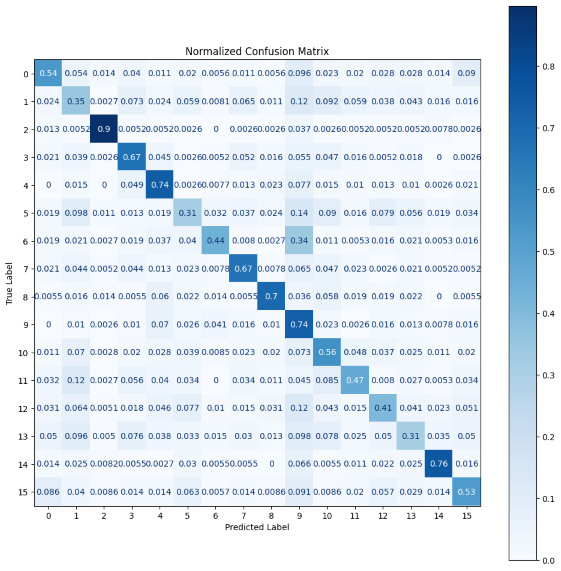

- **Analyse de la Matrice de Confusion :**

- **Performance par Classe :**

    Certaines classes sont relativement bien reconnues par le modèle, comme les classes 2, 8 et 14 representant respectivement les emails, les dossiers et les CV qui ont des valeurs élevées sur la diagonale, indiquant une bonne précision. <br>
    Ces images ont un format spécifique qui leur sont propres. Les emails et les CV ont une mise en forme bien spécifique alors que les dossiers presentent peu de texte avec de grandes zones rectangulaires unies.<br><br>
    D'autres classes comme les classes 1, 5, 6, 11 à 13 qui representent respectivement des questionnaires, des papiers scientifiques, presentations et factures, montrent une performance plus faible avec des valeurs plus basses sur la diagonale et des confusions plus fréquentes avec d'autres classes.  <br>
    Le manque de details ressortis par le modele ne permet pas de distinguer ces documents qui ont des formes similaires et la presence de données equivalentes. Ils contiennent tous des paragraphes avec la presences de chiffres ou de tableaux.

- **Confusions Notables :**

    Les classes 1 (formulaire) et 12 (presentation) montrent des confusions significatives avec plusieurs autres classes.
    La classe 7 (cahier des charges) est souvent confondue avec les classes 0 (lettre) et 3 (document manuscrit).
    La classe 13 (questionnaire) est fréquemment confondue avec les classes 0, 3 et 7 (lettre, document manuscrit, cahier des charges).


**4.Conclusion**

Le modèle montre une performance modeste avec une précision stable sur les ensembles de validation et de test. Cependant, il existe des classes spécifiques où la performance pourrait être améliorée en réduisant les confusions.

**5.Améliorations Potentielles :**

Le modele ne semble pas faire ressortir suffisamment d'informations pour pouvoir differencier les differents types de documents.
Plusieurs possibilitées s'offrent à nous : 
- **Augmentation des données :** Augmenter la quantité de données d'entraînement pour que le modele puisse mieux aprehender les differentes classes
- **Augmentation de la période d'apprentissage :** Augmenter le nombre d'epoques d'apprentissage afin de réduire le coût et améliorer la precision
- **Complexifier le modèle :** Augmenter le nombre de couches neuronales afin d'accroitre le nombre d'informations et de details pour mieux distinguer les differentes classes

Augmenter le nombre d'epoques ne ferait qu'overfitter le modele et n'améliorerait la precision que sur le dataset d'entrainement. De plus, cela prendrait beaucoup de temps pour un resultat incertain.
Augmenter le dataset reste peut concluant car il augmenterait le temps d'apprentissage sans apporter d'informations supplementaires sur le dataset.

On privilégie l'ajout de couches supplémentaires afin d'accroitre le niveau d'information même s'il ajoutera du temps de traitement



- **Modèle 2 : CNN complexifié**



**1.Architecture du Modèle**

Le modèle CNN est structuré comme suit :

- Couche de Convolution 1 (seq1)
- Couche de Convolution 2 (seq2)
- Couche de Convolution 3 (seq3) 
- Couche classificatrice (Classifier)


**2.Flux de Données dans le Modèle**

- Entrée : L'image d'entrée est une image en niveau de gris avec 1 canal.

- Seq1 : La première couche de convolution applique 16 filtres de taille 5x5, suivie d'une activation ReLU et d'une opération de pooling pour réduire la dimension.

- Seq2 : La deuxième couche de convolution applique 32 filtres de taille 5x5, suivie d'une activation ReLU et d'une opération de pooling.

- Seq3 : La troisième couche de convolution applique 64 filtres de taille 5x5, suivie d'une activation ReLU et d'une opération de pooling.

![CNN complexe - couche sequentielle](../data/visualization/Sequentiel_complexe.png)

- Classifier : La couche linéaire applique une transformation linéaire, suivie d'une activation ReLU et d'un Dropout, deux fois afin de réduire les dimentions, éliminer les informations non pertinentes et eviter l'overfitting.

![CNN complexe - couche sequentielle](../data/visualization/CNN_complexe.png)

Cette architecture est interessante car elle permet de facilement augmenter le nombre de couches de convolution jusqu'à 6 si le modele est concluant 

**3.Performance du model**

**Exactitude de la Validation et du Test :**

Les précisions de validation et de test sont d'environ **33%** après 15 epoques d'apprentissage. Cela indique que le modèle fonctionne de manière relativement cohérente sur les ensembles de validation et de test, mais le pourcentage reste faible. On a du limiter l'apprentissage à 15 epoques car il a duré 1085 minutes.
Le coût est réduit progressivement ce qui est encourageant avec un optimizer SGD avec un learning rate de 1e-3.
A la vue de la trajectoire, il faudrait augmenter le nombre d'epoques afin d'atteindre un minimum local pour la fonction de coût.


![CNN complexe accuracy](../data/visualization/Apprentissage_CNN_3_layers.png)

On obtient une precision de 33% ce qui est encourageant pour afiner le modèle.


**Perte de Validation et de Test :**

Le coût de validation et de test est de 2,01. Les valeurs élevées de côut indiquent que le modèle ne detecte pas assez efficacement les caractéristiques des documents ce qui pourrait venir dune durée d'apprentissage faible.

**La Matrice de Confusion**

![CNN complexe accuracy](../data/visualization/CNN_v1_accuracy.png)

**Analyse de la Matrice de Confusion :**

**Performance par Classe :**

Certaines classes sont relativement bien reconnues par le modèle, comme les classes 2, 4, 7, 8, 14 et 15 representant respectivement les emails, les dossiers, les CV et des mémos qui ont des valeurs élevées sur la diagonale, indiquant une bonne précision. <br>
Ces images ont un format spécifique qui leur sont propres. Les emails et les CV ont une mise en forme bien spécifique alors que les dossiers presentent peu de texte avec de grandes zones rectangulaires unies. Les publicités sont aussi bien detectées du à la presence d'images.<br><br>
D'autres classes comme les classes 5, 10, 12 et 13 qui representent respectivement des rapports, des budgets, presentations et questionnaires, ne sont pas du tout detectés dans leurs classes respectives.  <br>
Le manque de details ressortis par le modele pour ces documents ne permet pas de les distinguer. Ils contiennent tous des paragraphes avec la presences de chiffres ou de tableaux.

**Confusions Notables :**

Les classes 15 (mémo) semble récuperé une majorité des documents lorsqu'ils ne sont pass assez bien detectés.


**4.Conclusion**

Le modèle montre une bonne performance sur quelques classes mais la précision reste instable. Le temps d'execution reste long face à un coût qui n'a pas atteint son minimum. De plus, le modele pourrait se voir amélioré par l'ajout de couche supplémentaire du fait de son architecture

**5.Améliorations Potentielles :**

Le modele ne semble pas faire ressortir suffisamment d'informations sur certaines classes pour pouvoir differencier les differents types de documents.
Plusieurs possibilitées s'offrent à nous : 
- **Augmentation des données :** Augmenter la quantité de données d'entraînement pour que le modele puisse mieux appréhender les differentes classes
- **Augmentation de la période d'apprentissage :** Augmenter le nombre d'epoques d'apprentissage afin de réduire le coût et améliorer la precision
- **Complexifier le modèle :** Augmenter le nombre de couches neuronales afin d'accroitre le nombre d'informations et de details pour mieux distinguer les differentes classes

Le modèle est pertinent et avec un plus grand dataset et un plus grand nombre d'epoques d'entrainement, le modele serait plus fiable. Cependant le temps d'entrainement reste beaucoup trop long. Avec un temps plus grand d'entrainement et l'acces à plusieurs GPU pour paralleliser les calculs permettrait d'améliorer ce modele prometteur.

On souhaite explorer le transfert de connaissance afin de trouver un modele performant que l'on pourrait améliorer pour notre classification spécifique.



- **Modèle par transfert de connaissance**

On s'interesse aux differents modeles de classifications utilisant des reseaux de neurones. On remarque qu'un modele en particulier se differencie des autres modeles :

![Utilisation des modeles de deep learning dans les papiers de recherche](../data/visualization/Models_usage.png)
    
On remarque EfficientNet comme un modele devenu préponderant et majoritaire, suivi de ResNet

Cela est du principalement à la forte précision du modele pour un faible nombre de parametres en sortie et donc de couches neuronales et de temps d'apprentissage. Le modele est performant dans la classification d'image mais aussi dans tout autre probleme de classification.

![EfficientNet accuracy](../data/visualization/efficient_net_vs_other_models.png)


**EfficientNet :** 

L'application d'un modèle préentraîné tel qu'EfficientNet a été privilégiée en raison de ses caractéristiques remarquables en termes d'exigences en mémoire et en ressources matérielles. Comparé à d'autres modèles plus complexes, EfficientNet se distingue par sa légèreté, ce qui le rend particulièrement adapté aux environnements contraints en ressources.<br>
En intégrant EfficientNet, il est possible d'améliorer les performances de notre modèle tout en minimisant la consommation de ressources matérielles. 

- **Modèle 3: Modèle Pré-entraîné EfficientNet B0**

**1.Introduction:**

EfficientNet-B0 est un modèle de réseau neuronal convolutif (CNN) reconnu pour son efficacité et ses performances élevées. Il est pré-entraîné sur ImageNet, un dataset de plus d'un million d'image réparties en 1000 classes, ce qui améliore la rapidité et la précision de l'entraînement sur de nouveaux datasets.

La version B0 est la plus petite et la plus légère de la famille EfficientNet, ce qui la rend appropriée pour des applications nécessitant une utilisation limitée de la RAM et du GPU.

**2.Prétraitement et Initialisation**

Le modèle que nous utilisons est pré-entraîné sur le dataset ImageNet, ce qui lui permet de bénéficier de connaissances préalables pour des tâches de classification d'images. L'utilisation de ces poids pré-entraînés accélère la convergence lors de l'entraînement sur notre propre dataset et améliore la performance du modèle.

**3.Détails Techniques**

- **Architecture de Base :**  EfficientNet-B0 utilise un ensemble de blocs convolutifs efficaces qui combinent des convolutions standard et des convolutions de profondeur séparables. Cela réduit le nombre de paramètres tout en maintenant une performance élevée.

![EfficientNet B0 architecture](../data/visualization/EffnetB0.png)

- **Stratégie d'Initialisation :**  Les poids initiaux sont tirés des poids pré-entraînés sur ImageNet, spécifiés par models.EfficientNet_B0_Weights.DEFAULT.

- **Modification du Classificateur:**  Pour adapter EfficientNet-B0 à notre tâche spécifique de classification, nous avons modifié la dernière couche du classificateur. Par défaut, la couche de sortie du modèle pré-entraîné est conçue pour classer les images en 1000 catégories (classes d'ImageNet). Nous avons remplacé cette couche par une nouvelle couche linéaire adaptée au nombre de classes de notre problème (16 classes)

**4.Avantages de l'EfficientNet-B0**

**Efficacité :** L'un des principaux avantages d'EfficientNet-B0 est son efficacité en termes de calcul et de mémoire, grâce à une architecture optimisée qui utilise des convolutions de profondeur séparables.

**Précision :** Malgré sa taille compacte, EfficientNet-B0 offre une précision comparable à celle de modèles beaucoup plus volumineux.

**5.Performance du model**

**Exactitude de la Validation et du Test :**

Les précisions de validation et de test sont d'environ **77,7 %**. Cela indique que le modèle fonctionne de manière cohérente sur les ensembles de validation et de test, ce qui suggère que le modèle se généralise bien aux données non vues.
Perte de Validation et de Test :

La perte de validation et de test est identique à 1.0063, ce qui renforce l'idée que la performance du modèle est stable.


**La Matrice de Confusion** 

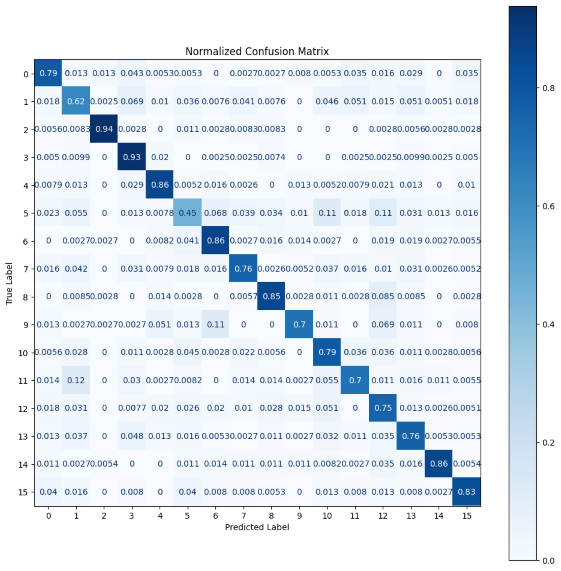


**Analyse de la Matrice de Confusion :**

**Performance par Classe :**

Certaines classes sont très bien reconnues par le modèle, comme les classes 0, 2, 3, 6, 8, 11, 12, 13 et 15 qui ont des valeurs élevées sur la diagonale, indiquant une bonne précision.<br>
D'autres classes comme les classes 1 (questionnaire) et 5 (rapport scientifiques) montrent une performance plus faible surement lié à la mise en page et à la presence d'éléments similaires à d'autres classes comme les budgets ou les presentations.

**Confusions Notables :**

Les classes 5 et 10 montrent des confusions significatives avec plusieurs autres classes.
La classe 7 est souvent confondue avec les classes 0 et 3.
La classe 13 est fréquemment confondue avec les classes 0, 3 et 7.

**6.Conclusion**

Le modèle montre une bonne performance globale avec une précision stable sur les ensembles de validation et de test. Cependant, il existe deux classes sous performantes pourrait être améliorée en réduisant la confusion.

**7.Améliorations Potentielles :**

Pour améliorer la performance globale, il serait bénéfique de se concentrer sur les classes avec des taux de confusion élevés.
Pour cela on pourrait :

- **Augmentation des données :** Augmenter la quantité de données d'entraînement pour que le modele puisse mieux appréhender les differentes classes. 
- **Augmentation de la période d'apprentissage :** Augmenter le nombre d'epoques d'apprentissage afin de réduire le coût et améliorer la precision. Cependant on augmente le risque d'overfitting et il n'est pas sur que cela augmente la precision sur les classes 1 et 5
- **Complexifier le modèle linéaire :** Ajouter des couches supplémentaires dans la partie linéaire afin de supprimer certains éléments qui défavoriseraient les classes 1 et 5
- **Complexifier le modèle neuronale:** Ajouter une couche neuronales supplementaire afin de faire ressortir plus d'informations sur les classes avec une prediction en dessous de la precision globale
- **Changer pour un modele plus complexe :** Passer à des modeles EfficientNet plus complexes et plus couteux en entrainement qui font ressortir plus d'informations

- **Modèle 4: Amélioration du modèle EfficientNet B0**

**1.Introduction:**

EfficientNet-B0 possede de bonnes perofrmances sur le dataset cependant la classe 1 et la classe 5 sont mal detectées et souvent confondues respectivement avec la classe 3 et la classe 10 et 12.

On souhaite iterer sur le modèle B0 en ajoutant une couche neuronal supplémentaire ou bien en améliorant le classificateur.

**2.Prétraitement et Initialisation**

Le modèle que nous utilisons est pré-entraîné sur le dataset ImageNet :
- Neuronal Add_On : On ajoute dans une couche neuronale supplémentaires, tout en concervant les poids initiaux sur les couches precedentes et on entraines ce nouveau modele afin d'accroitre les details différentiant pour les classes faiblement reconnues

- Linear Add-On : Onmodifie le classificateur avec une couche linéaire plus complexe pour mieux faire ressortir les differences entre les differentes classes


**3.Détails Techniques**

- **Architecture de Base :**  

    - Neuronal Add-On : On ajoute une derniere couche neuronale sous cette forme pour accroitre les differences et donc le nombre de parametres en sorties.

    ![EfficientNet B0 Neuronal Add-On](../data/visualization/EffNetB0_NAddOn.png)

    - Linear Add-On : On modifie le classificateur afin d'avoir un modele linéaire plus progressif tout en réduisant les elements peu differentiant

    ![EfficientNet B0 Linear Add-On](../data/visualization/EffNetB0_LAddOn.png)

- **Stratégie d'Initialisation :**  Les poids initiaux sont tirés des poids pré-entraînés sur ImageNet, spécifiés par models.EfficientNet_B0_Weights.DEFAULT.

**4.Avantages de modifier l'EfficientNet-B0**

**Efficacité :** On conserve la rapidité d'apprentissage du premier que l'on dégrade légèrement en ajoutant ces modifications. Cependant, on reste sur des temps d'apprentissage moins importants que l'entrainement de base d'un modèle similaire.

**Précision :** L'ajout de ces éléments devrait modifier la precision du modèle dans une moindre mesure. On ne risque pas ainsi de fortement dégrasé la precision. Cependant les gains seront moins importants que de retpartir d'un modele de base.

**5.Performance du model**

**Exactitude de la Validation et du Test :**

- Neuronal Add-On : **77,9%** de précision
- Linear Add-On : **78,2%** de précision

Le modèle Neuronal Add-On ne semble pas accroitre significativement la precision malgré un doublement du temps d'apprentissage. De même, le modèle Linear Add-On fait légèrement mieux sans être suffisamment differentiant. Cependant le temps d'apprentissage est similkaire au modèle EfficientNet B0.


**La Matrice de Confusion** 

- Neuronal Add-On

![Matrice de confusion EfficientNet B0 Linear Add-On](../data/visualization/cm_efnetB0_NAO.png)


- Linear Add-On

![Matrice de confusion EfficientNet B0 Neuronal Add-On](../data/visualization/cm_efnetB0_LAO.png)


**Analyse de la Matrice de Confusion :**

**Performance par Classe :**

Le NAO (Neuronal Add-On) accroît la confusion autour de la classe 5 (rapport scientifique) et dans une moindre mesure sur la classe 13( questionnaires).<br>
Ainsi le modèle accroit légèrement sa precision au profit de l'abandon de la classe 5 qui ne se differencie pas assez.<br>
Le modèle LAO (Linear Add-On) semble lui au contraire lisser les classes et reduire les disparitées presentes entre les classes.

**6.Conclusion**

Le modèle est légèrement plus performant avec l'ajout d'une couche linéaire. Cependant l'ajout d'une couche neuronnale supplémentaire ne renforce que les disparitées.
De plus ces modèles demandes plus de temps d'entrainement car pour un nombre d'époque équivalente, le modèle n'a pas réduit suffisamment son coût

![Loss EfficientNet B0 , LAO, NAO](../data/visualization/EffNetB0_Loss.png)

**7.Améliorations Potentielles :**

Pour améliorer la performance globale, on peut soit augmenter la durée d'entrainement ce qui pourrait entrainer un overfitting, la taille du dataset en augmentant la part des classes mal évaluées.

On explore par la suite une autre version du modèle EfficientNet plus couteuse en temps d'apprentissage mais qui semble plus efficace

- **Modèle 3: Modèle Pré-entraîné EfficientNet B1**

**1.Introduction:**

EfficientNet-B1 est un modèle de réseau neuronal convolutif (CNN) dérivé d'EfficientNet-B0. Il est aussi pré-entraîné sur ImageNet, un dataset de plus d'un million d'image réparties en 1000 classes.

La version B1 est plus complexe et plus grande que la version B0 mais reste suffisamment rapide comparés aux modèles plus performant allant jusqu'à B7. 

**2.Prétraitement et Initialisation**

L'utilisation de ces poids pré-entraînés accélère la convergence lors de l'entraînement sur notre propre dataset et améliore la performance du modèle.

**3.Détails Techniques**

- **Architecture de Base :**  EfficientNet-B1 utilise un ensemble de blocs convolutifs similaire à EfficientNet-B0 avec quelques blocs convolutifs supplémentaires. Ainsi le modèle permet d'accroitre le niveau de détail detecté et ainsi il peut prendre en charge des images plus grandes.

![EfficientNet B1 architecture](../data/visualization/EffnetB1.png)

- **Stratégie d'Initialisation :**  Les poids initiaux sont tirés des poids pré-entraînés sur ImageNet, spécifiés par models.EfficientNet_B0_Weights.DEFAULT.

- **Modification du Classificateur:**  Pour adapter EfficientNet-B1 à notre tâche spécifique de classification, nous avons modifié la dernière couche du classificateur. Par défaut, la couche de sortie du modèle pré-entraîné est conçue pour classer les images en 1000 catégories (classes d'ImageNet). Nous avons remplacé cette couche par une nouvelle couche linéaire adaptée au nombre de classes de notre problème (16 classes)

**4.Avantages de l'EfficientNet-B1**

**Efficacité :** L'un des principaux avantages d'EfficientNet-B1 est sa plus grande précision par rapport à EfficientNet-B0 sans pour autant augmenter de manière considérable le temps de calcule.

**Précision :** Une meilleure précision par rapport à EfficientNet-B0.

**5.Performance du model**

**Exactitude de la Validation et du Test :**

Les précisions de validation et de test sont d'environ **79,6 %**. Cela indique que le modèle fonctionne de manière cohérente sur les ensembles de validation et de test, ce qui suggère que le modèle se généralise bien aux données non vues.

Perte de Validation et de Test :

La perte de validation et de test sont de 0.93 et 0.91, ce qui renforce l'idée que la performance du modèle est stable. De plus, le coût est réduit par rapport à EfiicientNet-B0


**La Matrice de Confusion** 

![Matrice de confusion B1](../data/visualization/cm_efnet_B1.png)


**Analyse de la Matrice de Confusion :**

**Performance par Classe :**

Les classes 1 (questionnaire) et 5 (rapport scientifiques) montrent une performance plus faible surement lié à la mise en page et à la presence d'éléments similaires à d'autres classes comme les budgets ou les presentations. Le modèle rest ainsi plus performant là ù EfficientNet-B0 était déjà performant mais il n'arrive pas à compenser les faiblesses de B0 sur la classe 1 et 5

**Confusions Notables :**

Les classes 1 et 5 se confondent avec la classe 7. montrent des confusions significatives avec plusieurs autres classes.
La classe 6 et 7 sont performantes mais elles réduisent le recall car d'autres classes sont detectées dans celle-ci.

**6.Conclusion**

Le modèle montre une bonne performance globale avec une précision stable sur les ensembles de validation et de test. Cependant, il perciste deux classes sous performantes qui pourraient être améliorées enaugmentant le dataset d'entrainement.

**7.Améliorations Potentielles :**

Pour améliorer la performance globale, il serait bénéfique de se concentrer sur les classes avec des taux de confusion élevés.
Pour cela on pourrait :

- **Augmentation des données :** Augmenter la quantité de données d'entraînement pour que le modele puisse mieux appréhender les differentes classes. 
- **Augmentation de la période d'apprentissage :** Augmenter le nombre d'epoques d'apprentissage afin de réduire le coût et améliorer la precision. Cependant on augmente le risque d'overfitting et il n'est pas sur que cela augmente la precision sur les classes 1 et 5
- **Changer pour un modele plus complexe :** Passer sur les modèles B2 à B7. Cependant ils consomment beaucoup de ressources, RAM, GPU et temps d'apprentissage.

##### 3.2 CNN retenu

Après avoir comparé les performances des différents modèles, nous avons choisi le Modèle Pré-entraîné EfficientNet-B1 pour notre classification. 
Ce modèle a montré une bonne performance de sur l'ensemble d'entrainement.
De plus, c'est le modèle qui a su réduire le plus efficacement le coût.

![Coût modèles EfficientNet](../data/visualization/EffNet_loss.png)

##### 3.3 Présentation des résultats obtenus

Le modèle EfficientNet B1

##### 3.4 Interprétabilité

**1.Introduction:**

Grad-CAM, ou Gradient-weighted Class Activation Mapping, est une technique utilisée pour fournir des explications visuelles des prédictions faites par les réseaux de neurones convolutifs (CNN). Cette méthode met en évidence les régions de l'image d'entrée qui sont les plus pertinentes pour la décision du modèle. En utilisant les gradients du concept cible, qui se dirigent vers la dernière couche convolutionnelle, Grad-CAM produit une carte de localisation grossière des régions importantes de l'image. Cela aide à comprendre et à interpréter le comportement du modèle, ce qui est crucial dans les applications où la transparence du modèle est nécessaire.

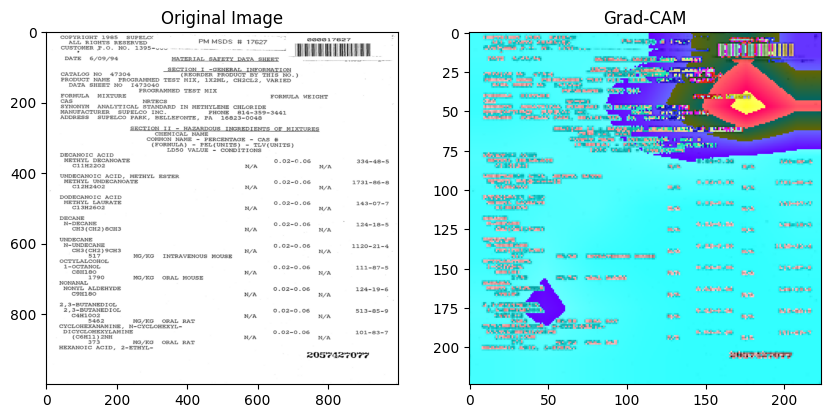


**2.Interprétation :**

- La visualisation de la carte thermique montre les zones de l'image originale qui sont importantes pour la prédiction du CNN. Les intensités de couleur dans la carte Grad-CAM représentent le niveau d'importance, les couleurs chaudes (rouges et jaunes) indiquant les régions ayant un impact plus élevé sur la prédiction.

- Les régions avec des couleurs chaudes, comme le coin supérieur droit et quelques zones dispersées, sont les parties de l'image sur lesquelles le modèle CNN s'est concentré pour sa prédiction.

- Les régions plus froides (bleus et verts) sont des zones moins significatives pour le processus de décision du modèle.

**Limites des analyses visuelles :**

Les analyses visuelles, telles que celles fournies par Grad-CAM, sont très efficaces pour comprendre et interpréter les décisions des modèles de reconnaissance d'images. Cependant, ces méthodes montrent leurs limites lorsque les documents sont visuellement similaires.


- Similarité Visuelle :

Lorsque des documents sont visuellement très similaires, il devient difficile pour les modèles basés uniquement sur l'image de les discriminer.Ce qui complique la tâche de classification basée uniquement sur les caractéristiques visuelles.

- Complexité du Contenu :

Les documents peuvent contenir des informations complexes et denses en texte qui ne peuvent pas être complètement capturées par des modèles basés uniquement sur des images.

#### 4. Choix de la librairie OCR.

##### 4.1 Présentation de la librairie OCR choisie et justification

Pour l'extraction du texte à partir des documents scannés, nous avons choisi d'utiliser Pytesseract.
Cette librairie a été choisie parmis les librairies Pytesseract, Keras-ocr et easyocr pour plusieurs raisons:
- Il s'agit actuellement du standard de l'industrie.
- Une batterie de test a été faite sur un autre jeu de donnée dont le texte avait déja été extrait et les résultats des différents OCR ont été comparés au texte réel.

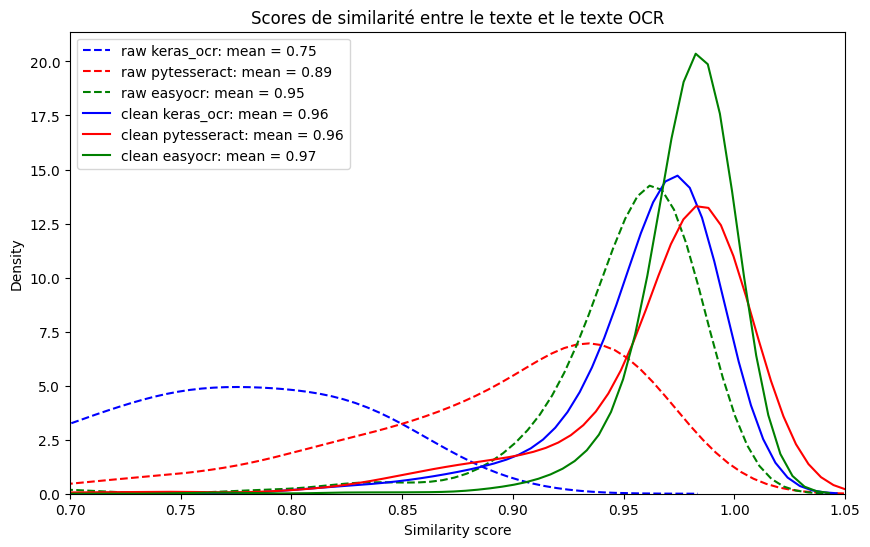

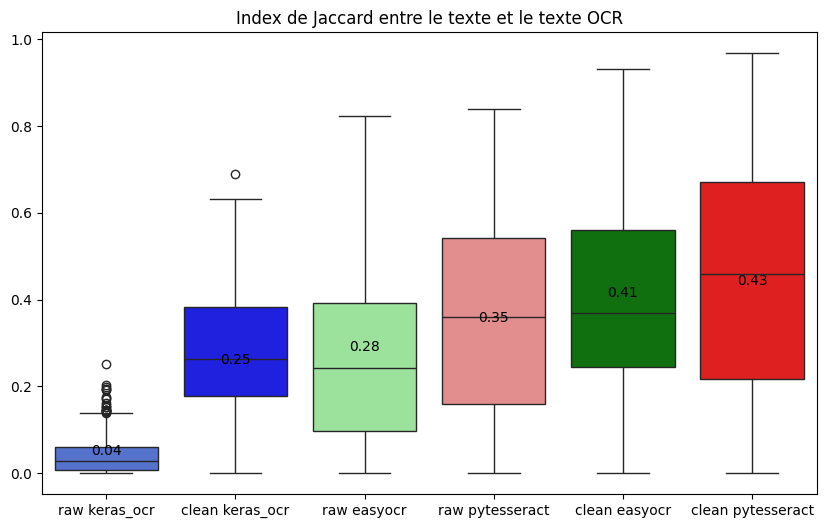

A noter cependant plusieurs bémols:
- La librairie d'ocr a été benchmarkée en utilisant un jeu de donnée similaire au jeu de données principal. Ce jeu de données était associé à du texte lui même issu d'un ocr. Ocr qui était parfois approximatif. Nous avons donc tenté de nous approcher d'un texte de référence imparfait plutot que sur le texte réel des documents.
- Après l'ocr et le nettoyage du texte, nous nous retrouvons comme pour le jeu de données du benchmark avec du texte inexacte dans de nombreux cas. Ce fait va forcément impacter les résultats des modèles de NLP.

##### 4.2 Présentation des résultats de l'extraction

Après avoir utilisé Pytesseract sur le jeu de données, nous avons récupéré un ensemble de texte brut.
Le préprocessing du texte extrait s'est fait en plusieurs étapes dont les principales sont :
- suppression des characteres speciaux
- suppression des stop words
- suppression des mots qui n'existent pas
- lemmatization
- suppression des mots qui apparaissent moins de n fois dans tous le corpus de texte

A la fin du preprocessing nous nous retrouvons avec 20000 listes de mots qui serviront de base à l'entrainement des modèles de NLP.

#### 5. Entraînement du modèle de NLP.

##### 5.1 Modèles testés et résultats obtenus

Plusieurs modèles de NLP ont été testés dans le cadre de ce projet. Chaque modèle a été évalué en fonction de son accuracy sur un ensemble d'entrainement de 20000 documents. On a décidé de se séparer rapidement des modèles Naive Bayes et Decision Tree qui avaient les moins bons résultats, pour se concentrer sur les modèles Logistic Regression, SVM and Random Forest pour optimiser les hyperparamètres sur un échantillon de 1000 documents cette fois-ci.

De plus des modèles basés sur la sémantique (word2vec, Bert et GPT) ont rapidement été écartés car ils ne produisaient pas de bons résultats. On suppose que cela vient du fait que les tokenizers n'etaient pas capable de travailler correctement avec les mots inconnus présents en grand nombre dans le texte à ce point.

Nous avons utilisés une approche bag of word et une approche tf-idf pour la vectorisation des textes. Ces deux approches sont interchangeables pour tous les modèles testés, la différence dans les métriques étant anecdotique. Nous avons utilisé l'approche tf-idf pour la vectorisation.

- **Modèle 1 : Logistic Regression**

On a testé les modèles de Logistic Regression à 3 niveaux : Lasso, Ridge et Elastic Net.

Les hyperparamètres optimaux sont : 
- Ridge ("l2" penalty) : accuracy = 0.542714, F1 score = 0.529005, best parameters = {'C': 1, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.001}
- Lasso ("l1" penalty) : accuracy = 0.542714, F1 score = 0.53466, best parameters = {'C': 100, 'max_iter': 5000, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.01}
- Elastic Net ("elasticnet" penalty) : accuracy = 0.557789, F1 score = 0.551118, best parameters = {'C': 100, 'l1_ratio': 0.1, 'max_iter': 5000, 'penalty': 'elasticnet', 'solver': 'saga', 'tol': 0.01}

Au vu des résultats, on décide de conserver le modèle Logistic Regression "Elastic Net". Pour les hyperparamètres optimaux, on peut partir de ceux-là "{'C': 100, 'l1_ratio': 0.1, 'max_iter': 5000, 'penalty': 'elasticnet', 'solver': 'saga', 'tol': 0.01}" où retenter un GridSearch sur un échantillon plus conséquent.

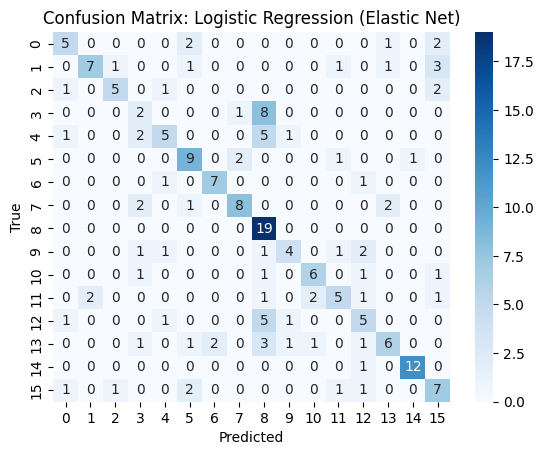
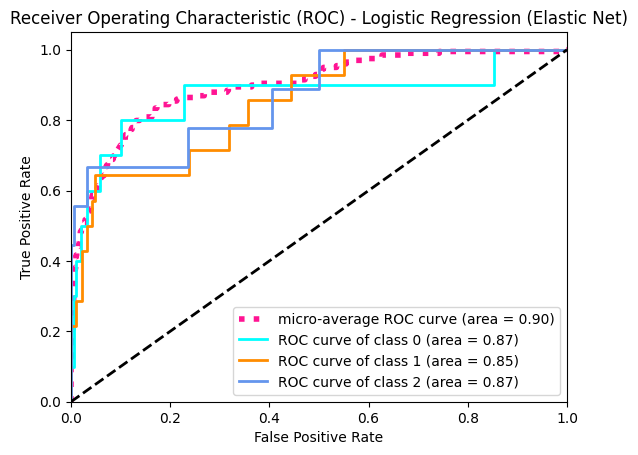

- **Modèle 2 : SVM**

Les hyperparamètres optimaux sont : accuracy = 0.567839, F1 score = 0.564915, best parameters = {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}.

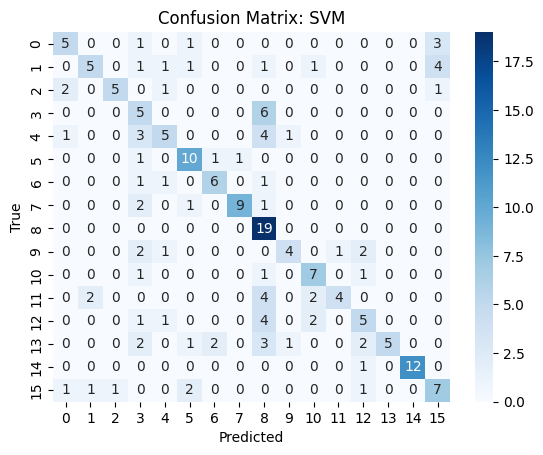

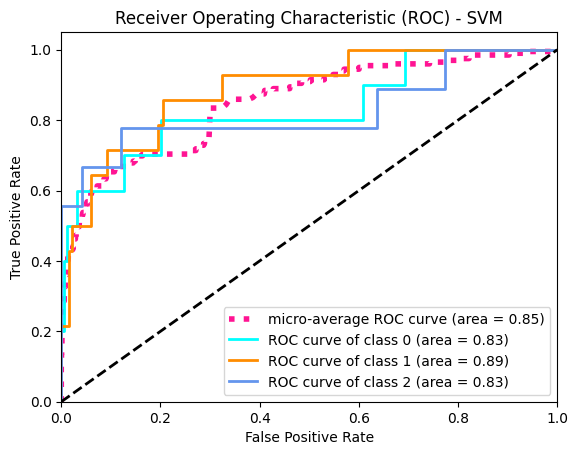

- **Modèle 3 : Random Forest**

Les hyperparamètres optimaux sont : accuracy = 0.572864, F1 score = 0.564937, best parameters = {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}.

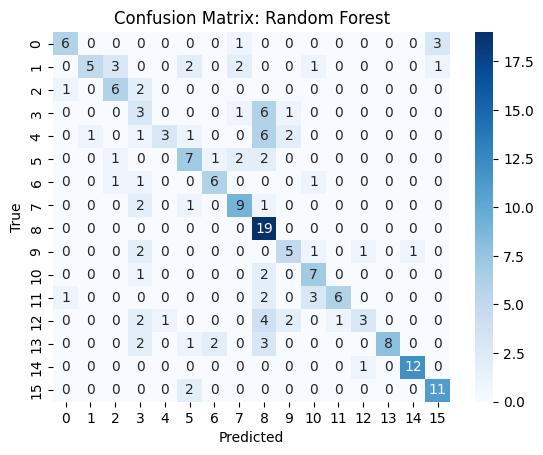
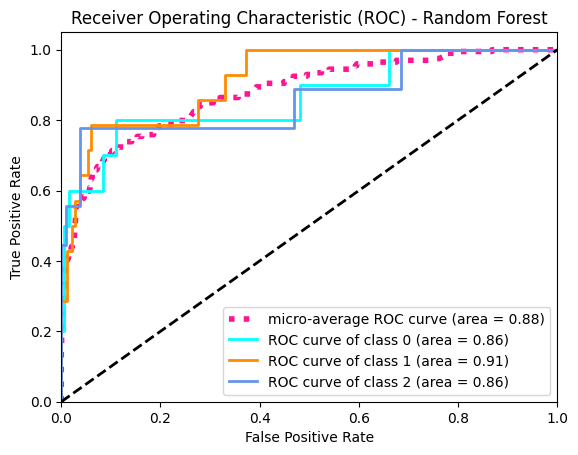

##### 5.2 Modèle retenu et tuning des hyperparamètres

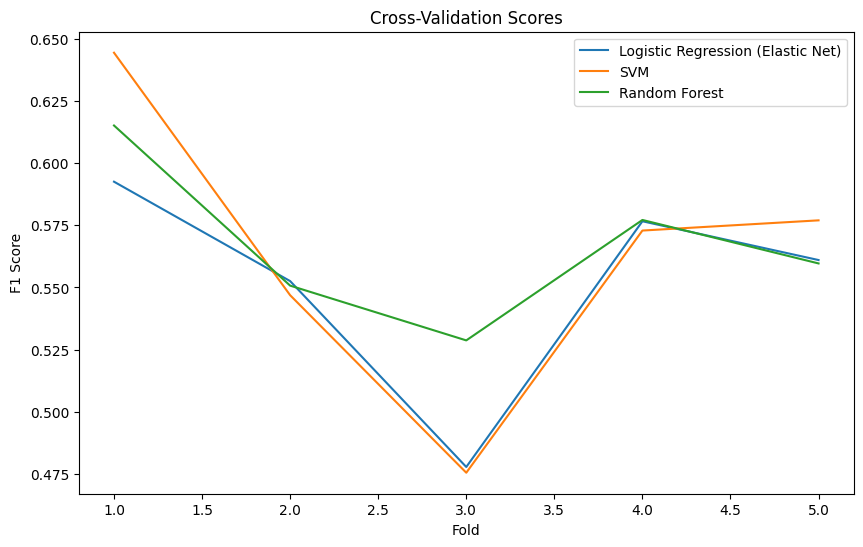

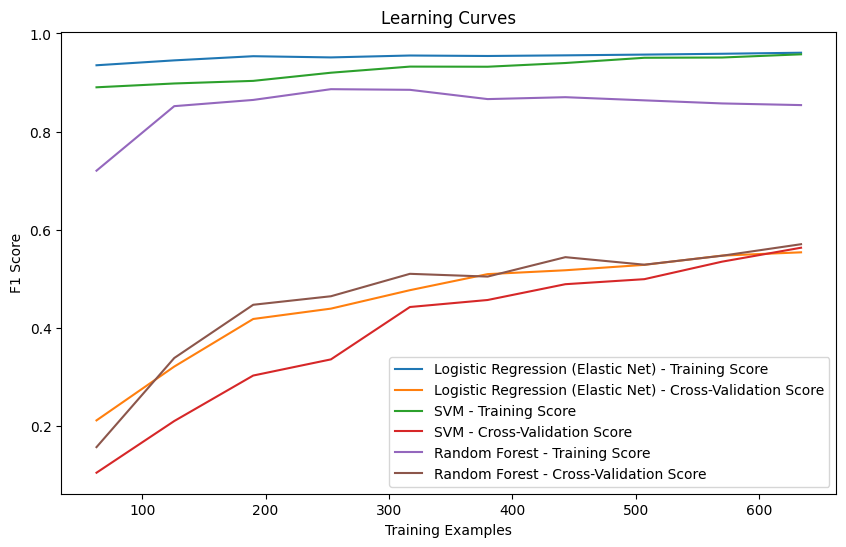


Après avoir comparé les performances des différents modèles, nous avons choisi le modèle truc pour notre système de classification.
Ce modèle a montré une bonne performance de X sur l'ensemble d'entrainement.

Une fois le modèle sélectionné, nous avons tenté de l'optimiser de cette façon:

##### 5.3 Présentation des résultats obtenus

Nous arrivons à un modèle final dont les résultats sont les suivants pour un jeu d'entrainement de 20000 textes cette fois :

- Accuracy : 0.67
- F1-Score : 0.68

![alt text](../data/visualization/cm_nlp.png)

On constate une accuracy de 67% qui n'est pas mal.
On constate également que certaines classes de documents sont plus difficile que d'autres à classifier pour ce modèle.
Par exemple les classes 3, 4, 10 et 12 (correspondant respectivement à handwritten, advertisement, budget et presentation) sont souvent prédites comme faisant partie de la classe 8 (file folder).

##### 5.4 Interprétabilité

Suite à l'entrainement du modèle de regression logistique, un poids a été associé à chaque mots possible pour chaque classe. Ces poids indiquent l’importance du mot pour la prédiction des classes. Donc en examinant simplement les poids du modèle entrainé, on peut comprendre quels mots sont les plus importants pour la prédiction de chaque classe. Cela rend l’interprétabilité de ce modèle très simple.

Nous avons choisi d’utiliser une représentation visuelle sous forme de wordcloud des mots les plus importants pour chaque classes.

Par exemple, pour les classes Leter et Invoice, les mots ayant le plus grand poids dans la prédiction sont les suivants.

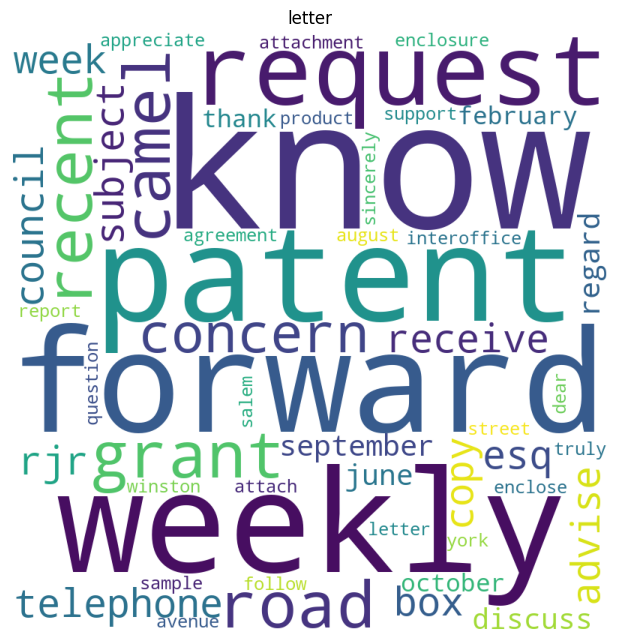

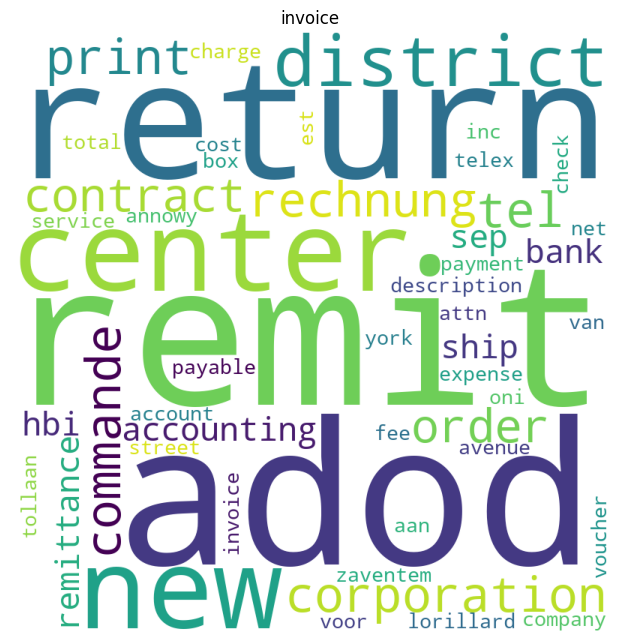

Cette analyse nous permet de visualiser quels sont les mots que notre modèle associe à chaque classe. Cependant, tout comme pour l’analyse visuelle avec le CNN, cette méthode montre ses limites lorsque les documents contiennent des mots similaires mais appartiennent à des classes différentes. C’est pourquoi les prédictions de notre modèle de NLP et notre modèle CNN ont été combinées pour obtenir une prédiction on l'espere plus précise.

#### 6. Mise en place du modèle de vote

##### 6.1 Explication de l'intérêt

L'utilisation d'un modèle de vote a plusieurs avantages.
- Cela permet de combiner les forces du modèle de CNN qui sera plus performant pour classifier un document selon son arrangement global et du modèle de NLP qui sera lui performant pour analyser le texte du document.
- Cela permet également de mitiger les erreurs eventuelles qu'un des deux modèles pourrait faire.

Nous esperons obtenir une meilleure accuracy global en combinant les modèles qu'avec les modèles seuls.

##### 6.2 Description du modèle de vote retenu

Pour le voting, nous avons choisi d'utiliser le modèle de classification par NLP utilisant la régression logistique. Ce n'est pas le modèle le plus performant, mais il s'est avéré plus complémentaire avec le modèle utilisant un CNN en terme d'accuracy des résultats.

Nous avons choisi d'utiliser un modèle de vote X dit "faible".
Ce type de modèle prend en compte les probabilités de chaque classe prédite par nos modèles.
Il assemble ces probabilités pour obtenir une nouvelle liste de probabilité pour chaque classe. La classe la plus probable est alors renvoyée comme prediction du modèle.
Un système de pondération des probabilités des deux modèle a également été entrainé de façon à ce que les prédictions d'un modèle performant sur une classe en particulier soient avantagées par rapport à l'autre modèle.

##### 6.3 Présentation des résultats du modèle

Après la mise en place du modèle de vote, nous avons évalué ses performances sur un ensemble de test de 4000 documents.
Les résultats obtenus sont les suivants :

- Accuracy: 0.8475
- F1 Score: 0.8479

![alt text](../data/visualization/cm_voting.png)

Pour rappel, voici les performances des modèles individuels :

- CNN accuracy: 0.8192
- NLP accuracy: 0.6795
- CNN F1 Score: 0.8196
- NLP F1 Score: 0.6884

On constate donc une amélioration substantielle de l'accuracy suite au voting.

#### 7. Conclusion

##### 7.1 Résumé des résultats obtenus

En combinant des modèles de classification visuelle et de classification textuelle, et en utilisant un modèle de vote pour combiner ces deux approches, nous avons réussi à obtenir une accuracy proche de 85%.

Cette approche hybride nous a permis de tirer parti des forces de chaque modèle, maximisant ainsi notre capacité à classer correctement les documents.

Le CNN a permis l’identification des caractéristiques visuelles uniques des documents (formatage, presence de colonnes ...etc), tandis que la NLP a été efficace pour comprendre le contenu du texte.
Le modèle de vote a ensuite servi de mécanisme de confirmation/arbitrage, pondérant les probabilités prédites par chaque modèle en fonction de leur pertinence pour chaque classe.

##### 7.2 Comparaison state of the art

En comparant nos résultats avec ceux de layoutLM (faire un benchmark ?), nous pouvons voir que notre système se comporte comme ci comme ca. (Insérez une comparaison).

##### 7.3 Axe d'amélioration

La difficulté principale du côté de l'approche NLP a été le preprocessing des documents en vue d'en obtenir le texte (OCR). La qualité des documents rendait difficile la lecture par la libairie d'ocr. La librairie utilisée n'etait pas toujours en mesure de produire le texte exacte du document et produisait très souvent des mots inexactes. Il serait certainement possible de pousser le prétraitement des images pour les rendres plus aptes à être lus par la librairie d'ocr.
On pourrait par exemple imaginer de remplacer des mots inexistant par le mot le plus proche dans la langue détectée.

Nous avons également constaté comme on peut s'y attendre qu'augmenter la taille du jeu d'entrainement améliorait les metriques évaluées. On pourrait certainement utiliser un jeu d'entrainement plus grand pour encore améliorer ces métriques. Il a cependant été observé des rendements décroissants en utilisant cette approche lors des phases d'entrainement.